<a href="https://colab.research.google.com/github/paulinakaszuba94/dataworkshop_matrix3/blob/master/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, exposure
import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

%reload_ext tensorboard

In [2]:
cd '/content/drive/My Drive/Colab Notebooks/dataworkshop_matrix/matrix3/dataworkshop_matrix3'

/content/drive/My Drive/Colab Notebooks/dataworkshop_matrix/matrix3/dataworkshop_matrix3


In [3]:
ls

data/  day1.ipynb  day2.ipynb  day3.ipynb  LICENSE  logs/  README.md


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']


In [6]:
len(np.unique(y_train)) #how many unique values do we have in y_train set? (from 0 to 42)

43

In [0]:
#we need to have a matrix with 43 columns; in each row will be only one "1" (i one column) and the rest numbers will be "0"
#and so on for all 34799 road signs (their IDs)

if y_train.ndim == 1: y_train = to_categorical(y_train)

if y_test.ndim == 1: y_test = to_categorical(y_test)

In [8]:
y_train.shape #it shows (rows, column)

(34799, 43)

In [9]:
X_test.shape, y_test.shape

((4410, 32, 32, 3), (4410, 43))

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [11]:
model = Sequential([
  Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),

  Flatten(),

  Dense(num_classes, activation='softmax')
])

#model.summary()
model.compile(loss= 'categorical_crossentropy', optimizer='Adam', metrics='accuracy')
model.fit(X_train, y_train)

1088/1088 [==============================] - 4s 4ms/step - loss: 9.7447 - accuracy: 0.7821


In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
  Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),

  Flatten(),

  Dense(num_classes, activation='softmax')
  ]) 
  
def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss= 'categorical_crossentropy', optimizer='Adam', metrics='accuracy')

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard( logdir, histogram_freq=1)
  
  model.fit(
      X_train, 
      y_train,
      batch_size=params_fit.get('batch size', 128),
      epochs=params_fit.get('epochs', 5),
      verbose=params_fit.get('verbose', 1),
      validation_data=params_fit.get('validation data', (X_train, y_train)),
      callbacks=[tensorboard_callback]
  )
  return model

In [13]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 3s 11ms/step - loss: 29.8191 - accuracy: 0.7504 - val_loss: 0.2236 - val_accuracy: 0.9500
Epoch 2/5
272/272 [==============================] - 3s 10ms/step - loss: 0.1769 - accuracy: 0.9584 - val_loss: 0.1092 - val_accuracy: 0.9751
Epoch 3/5
272/272 [==============================] - 3s 10ms/step - loss: 0.1203 - accuracy: 0.9732 - val_loss: 0.1308 - val_accuracy: 0.9714
Epoch 4/5
272/272 [==============================] - 3s 10ms/step - loss: 0.0941 - accuracy: 0.9781 - val_loss: 0.0491 - val_accuracy: 0.9897
Epoch 5/5
272/272 [==============================] - 3s 10ms/step - loss: 0.0702 - accuracy: 0.9834 - val_loss: 0.0279 - val_accuracy: 0.9938


In [14]:
y_pred_prob = model_trained.predict(X_test)
y_pred_prob

array([[1.09129637e-07, 1.12578447e-03, 4.59269911e-01, ...,
        3.96772384e-06, 1.29766613e-01, 1.29322438e-02],
       [1.48982849e-07, 1.04257611e-04, 5.81459343e-01, ...,
        1.10707697e-05, 5.88290952e-03, 3.65903112e-03],
       [1.11791230e-07, 1.66086585e-03, 2.18496785e-01, ...,
        9.99910753e-06, 1.03541784e-01, 1.08325062e-02],
       ...,
       [4.60180780e-03, 5.34527656e-03, 3.95832956e-03, ...,
        4.53891000e-03, 1.56212854e-03, 3.74879892e-04],
       [3.81764909e-03, 4.35594609e-03, 5.98364230e-03, ...,
        1.68378255e-03, 2.83827935e-03, 2.68141128e-04],
       [6.39253878e-04, 3.87085578e-03, 7.54647097e-03, ...,
        3.16717383e-03, 1.18738890e-03, 4.09955719e-05]], dtype=float32)

In [15]:
y_pred_prob[400] #we have a road sign; 
#the model tries to recognize its name; the model determines the probability for each ID - names are assigned to ID

array([1.0117395e-07, 9.9999988e-01, 4.3533448e-09, 3.4028310e-18,
       4.9960608e-08, 2.0352516e-10, 2.2395128e-09, 1.2350028e-18,
       1.3577214e-17, 1.0347817e-16, 5.4012348e-20, 1.6219053e-13,
       1.0741811e-17, 5.8617161e-18, 2.9481582e-22, 6.8382044e-19,
       6.3030833e-20, 1.5899932e-30, 1.6075202e-16, 2.9705707e-27,
       3.4333550e-18, 1.7183379e-25, 6.6953013e-21, 1.1468490e-26,
       1.3472761e-21, 1.0459293e-24, 2.9754303e-16, 1.1657200e-23,
       1.4333910e-14, 2.3296813e-19, 7.2981670e-26, 3.3920782e-23,
       2.8836262e-13, 2.2736750e-19, 1.1489555e-18, 2.3193131e-21,
       2.4484539e-25, 1.3043753e-22, 1.4829000e-25, 1.2016119e-27,
       9.6413163e-19, 1.6183615e-16, 5.4817241e-15], dtype=float32)

In [16]:
np.argmax(y_pred_prob[400]) #the highest probability in the matrix above has... (number of the argument)

1

In [17]:
labels_dict[np.argmax(y_pred_prob[400])] #are you right? It should be 'Speed limit (30km/h)'

'Speed limit (30km/h)'

<BarContainer object of 43 artists>

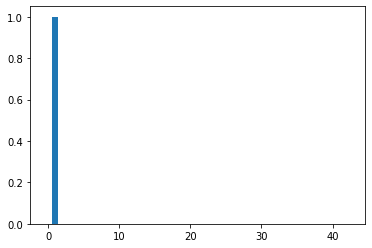

In [18]:
plt.bar(range(43), y_pred_prob[400]) #you can see on the bar probability distribution for different IDs

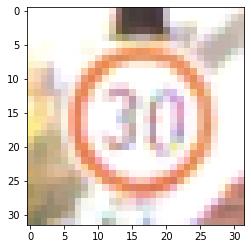

In [19]:
plt.imshow(X_test[400]) #image of road sign

In [0]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):
  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)

In [21]:
predict(model_trained, X_test, y_test)

0.8376417233560091

In [0]:
def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

In [23]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
  Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
  MaxPool2D(),
  Dropout(0.3),
  
  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Flatten(),

  Dense(1024, activation='relu'),
  Dropout(0.3),

  Dense(num_classes, activation='softmax')
  ]) 

train_and_predict(get_cnn_v2(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 3s 11ms/step - loss: 5.5791 - accuracy: 0.2416 - val_loss: 1.5084 - val_accuracy: 0.6009
Epoch 2/5
272/272 [==============================] - 3s 10ms/step - loss: 1.2346 - accuracy: 0.6430 - val_loss: 0.3999 - val_accuracy: 0.9212
Epoch 3/5
272/272 [==============================] - 3s 10ms/step - loss: 0.6567 - accuracy: 0.8055 - val_loss: 0.2396 - val_accuracy: 0.9451
Epoch 4/5
272/272 [==============================] - 3s 10ms/step - loss: 0.4595 - accuracy: 0.8632 - val_loss: 0.1310 - val_accuracy: 0.9670
Epoch 5/5
272/272 [==============================] - 3s 10ms/step - loss: 0.3558 - accuracy: 0.8936 - val_loss: 0.1177 - val_accuracy: 0.9767


0.8845804988662131

In [24]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
  Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
  Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),
  
  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Flatten(),

  Dense(1024, activation='relu'),
  Dropout(0.3),

  Dense(num_classes, activation='softmax')
  ]) 

train_and_predict(get_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.2892 - accuracy: 0.5194 - val_loss: 0.2842 - val_accuracy: 0.9352
Epoch 2/5
272/272 [==============================] - 3s 12ms/step - loss: 0.3671 - accuracy: 0.8931 - val_loss: 0.0706 - val_accuracy: 0.9842
Epoch 3/5
272/272 [==============================] - 3s 13ms/step - loss: 0.1922 - accuracy: 0.9447 - val_loss: 0.0469 - val_accuracy: 0.9898
Epoch 4/5
272/272 [==============================] - 3s 12ms/step - loss: 0.1335 - accuracy: 0.9619 - val_loss: 0.0167 - val_accuracy: 0.9964
Epoch 5/5
272/272 [==============================] - 3s 12ms/step - loss: 0.1010 - accuracy: 0.9702 - val_loss: 0.0139 - val_accuracy: 0.9975


0.9748299319727891

In [26]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
  Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
  Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
  MaxPool2D(),
  Dropout(0.3),
  
  Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Flatten(),

  Dense(1024, activation='relu'),
  Dropout(0.3),

  Dense(num_classes, activation='softmax')
  ]) 

train_and_predict(get_cnn_v4(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 15ms/step - loss: 2.5799 - accuracy: 0.3202 - val_loss: 1.0001 - val_accuracy: 0.7069
Epoch 2/5
272/272 [==============================] - 4s 14ms/step - loss: 0.9304 - accuracy: 0.7134 - val_loss: 0.2972 - val_accuracy: 0.9149
Epoch 3/5
272/272 [==============================] - 4s 14ms/step - loss: 0.4866 - accuracy: 0.8499 - val_loss: 0.1129 - val_accuracy: 0.9700
Epoch 4/5
272/272 [==============================] - 4s 14ms/step - loss: 0.3001 - accuracy: 0.9086 - val_loss: 0.0540 - val_accuracy: 0.9855
Epoch 5/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2386 - accuracy: 0.9271 - val_loss: 0.0411 - val_accuracy: 0.9893


0.9662131519274376

In [27]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
  Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
  Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
  MaxPool2D(),
  Dropout(0.3),
  
  Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Flatten(),

  Dense(1024, activation='relu'),
  Dropout(0.3),

  Dense(1024, activation='relu'),
  Dropout(0.3),

  Dense(num_classes, activation='softmax')
  ]) 

train_and_predict(get_cnn_v5(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 16ms/step - loss: 2.5854 - accuracy: 0.2995 - val_loss: 0.9680 - val_accuracy: 0.7023
Epoch 2/5
272/272 [==============================] - 4s 15ms/step - loss: 0.8593 - accuracy: 0.7274 - val_loss: 0.1959 - val_accuracy: 0.9372
Epoch 3/5
272/272 [==============================] - 4s 15ms/step - loss: 0.3834 - accuracy: 0.8819 - val_loss: 0.0956 - val_accuracy: 0.9719
Epoch 4/5
272/272 [==============================] - 4s 15ms/step - loss: 0.2573 - accuracy: 0.9232 - val_loss: 0.0490 - val_accuracy: 0.9869
Epoch 5/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1881 - accuracy: 0.9431 - val_loss: 0.0478 - val_accuracy: 0.9874


0.9582766439909297

In [28]:
X_train[0].shape #values describe a road sign; "3" means 3 channels RGB - we want to have only 1 

(32, 32, 3)

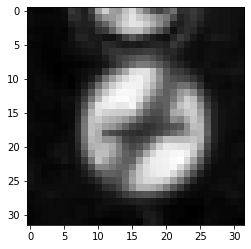

In [29]:
plt.imshow( color.rgb2gray(X_train[0]), cmap = plt.get_cmap('gray') )

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1, 32, 32, 1)
X_test_gray = color.rgb2gray(X_test).reshape(-1, 32, 32, 1)

In [33]:
model = get_cnn_v5((32,32,1), num_classes)
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 5s 17ms/step - loss: 2.6286 - accuracy: 0.2651 - val_loss: 0.6876 - val_accuracy: 0.7767
Epoch 2/5
272/272 [==============================] - 4s 15ms/step - loss: 0.5309 - accuracy: 0.8312 - val_loss: 0.1741 - val_accuracy: 0.9474
Epoch 3/5
272/272 [==============================] - 4s 15ms/step - loss: 0.2445 - accuracy: 0.9226 - val_loss: 0.0607 - val_accuracy: 0.9823
Epoch 4/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1584 - accuracy: 0.9502 - val_loss: 0.0382 - val_accuracy: 0.9888
Epoch 5/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1276 - accuracy: 0.9610 - val_loss: 0.0300 - val_accuracy: 0.9912


0.9578231292517007

In [0]:
def preproc_img(img):
  hsv = color.rgb2hsv(img)
  hsv[:, :, 2] = exposure.equalize_adapthist(hsv[:, :, 2])
  img = color.hsv2rgb(hsv)

  return img

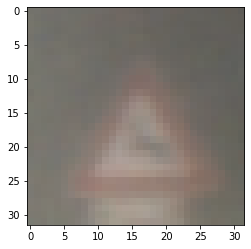

In [35]:
plt.imshow( X_train[400] )

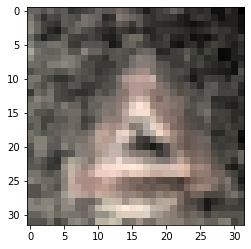

In [36]:
plt.imshow( preproc_img(X_train[400]) )

In [0]:
#%tensorboard --logdir logs #you can see result only using Chrome; correct code to do that in day3

In [0]:
def get_cnn_v6(input_shape, num_classes):
  return Sequential([
  Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
  MaxPool2D(),
  Dropout(0.5),

  Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
  MaxPool2D(),
  Dropout(0.3),

  Flatten(),

  Dense(1024, activation='relu'),
  Dropout(0.5),

  Dense(num_classes, activation='softmax')
  ])

In [0]:
model = get_cnn_v6(input_shape, num_classes)
params_fit = {
    'epochs':25
}
train_model(model, X_train, y_train, params_fit)

Epoch 1/25
272/272 [==============================] - 6s 24ms/step - loss: 8.0284 - accuracy: 0.1391 - val_loss: 2.3173 - val_accuracy: 0.4013
Epoch 2/25
272/272 [==============================] - 6s 23ms/step - loss: 2.0969 - accuracy: 0.4031 - val_loss: 1.4121 - val_accuracy: 0.5897
Epoch 3/25
272/272 [==============================] - 6s 23ms/step - loss: 1.4459 - accuracy: 0.5612 - val_loss: 0.8164 - val_accuracy: 0.7698
Epoch 4/25
272/272 [==============================] - 6s 23ms/step - loss: 0.9570 - accuracy: 0.6987 - val_loss: 0.4123 - val_accuracy: 0.8903
Epoch 5/25
272/272 [==============================] - 6s 23ms/step - loss: 0.6952 - accuracy: 0.7805 - val_loss: 0.2904 - val_accuracy: 0.9227
Epoch 6/25
272/272 [==============================] - 6s 23ms/step - loss: 0.5442 - accuracy: 0.8278 - val_loss: 0.1783 - val_accuracy: 0.9563
Epoch 7/25
272/272 [==============================] - 6s 23ms/step - loss: 0.4588 - accuracy: 0.8564 - val_loss: 0.1577 - val_accuracy: 0.9558

'logs/20200401-170124'

In [0]:
#%tensorboard --logdir logs #you can see result only using Chrome; correct code to do that in day3